In [1]:
import pandas as pd
pd.options.display.max_rows = 100
import os

import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import wrangle_zillow
from env import get_db_url

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = wrangle_zillow.get_zillow()

In [3]:
df.head(5)

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,781532,12095076,1.0,NaN,NaN,3.0,4.0,NaN,9.0,3.0,...,6.037461e+13,-0.001011,2017-01-01,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN


In [4]:
#using 60/60 first to see what dataset looks like:
print('Before dropping nulls, %d rows, %d cols' % df.shape)

#dropping the cols & rows that do not meet the 60/60 standard
df = wrangle_zillow.handle_missing_values(df, prop_required_column=.6, prop_required_row=.60)
print('After dropping nulls, %d rows, %d cols' % df.shape)

Before dropping nulls, 52319 rows, 68 cols
After dropping nulls, 52319 rows, 34 cols


I lose barely anything and get rid of a lot of bulk, moving forward with removing nulls in columns and removing redundant columns as well. 

In [5]:
df = wrangle_zillow.wrangle_zillow()

In [6]:
df.head(5)

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,county,latitude,longitude,roomcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,acres,acres_bin,square_feet
0,3.5,4.0,3100.0,orange,33634931.0,-117869207.0,0.0,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01,0.103444,0.1,0.7
1,1.0,2.0,1465.0,ventura,34449266.0,-119281531.0,5.0,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,0.290335,0.3,0.3
2,2.0,3.0,1243.0,orange,33886168.0,-117823170.0,6.0,85289.0,564778.0,2016.0,479489.0,6488.30,0.005383,2017-01-01,0.193572,0.2,0.2
3,3.0,4.0,2376.0,los_angeles,34245180.0,-118240722.0,0.0,108918.0,145143.0,2016.0,36225.0,1777.51,-0.103410,2017-01-01,0.299311,0.3,0.5
4,3.0,4.0,2962.0,los_angeles,34145202.0,-118179824.0,0.0,276684.0,773303.0,2016.0,496619.0,9516.26,-0.001011,2017-01-01,1.446281,0.5,0.6


In [7]:
df.dtypes

bathroomcnt                      float64
bedroomcnt                       float64
calculatedfinishedsquarefeet     float64
county                            object
latitude                         float64
longitude                        float64
roomcnt                          float64
structuretaxvaluedollarcnt       float64
taxvaluedollarcnt                float64
assessmentyear                   float64
landtaxvaluedollarcnt            float64
taxamount                        float64
logerror                         float64
transactiondate                   object
acres                            float64
acres_bin                       category
square_feet                     category
dtype: object

In [8]:
### Split data using county for stratify 
train, validate, test = wrangle_zillow.split(df)



In [9]:
# set alpha 
a = .05

Question 1)

Does logerror differ across county/region of properties?


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

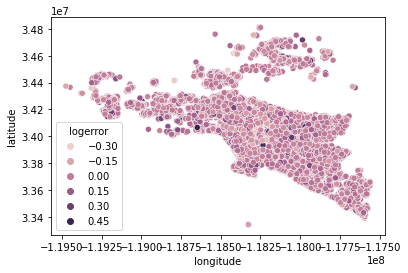

In [10]:
#make a scatter plot for is_outlier
sns.scatterplot(data=train, x='longitude', y='latitude', hue='logerror')

Don't see a specific county being responsible more than another.

H_0: There is no difference of variance or mean between county and logerror

H_1: There is a difference of variance or mean between county and logerror

In [11]:
# if p < alpha:
    # print('\nP is less than alpha. We reject the null hypothesis.')

Question 2)

Is there a relationship between number of baths and logerror?


H_0: There is no relationship between logerror and bathroom count

H_1: There is a relationship of mean between logerror and bathroom count


#creating a joinplot to see if any linear relationship (also adding in county)

print("Is there a relationship\nbetween bathroom count and logerror?")
sns.jointplot(x="bathroomcnt", y="logerror", data=train, hue = 'county')
plt.xlabel("Bathroomcnt")
plt.ylabel("Logerror")
plt.show()

In [12]:
alpha = .05
corr, p = stats.spearmanr(train.bathroomcnt, train.logerror)

if p < alpha:
    print('\nP is less than alpha. We reject the null hypothesis.')


P is less than alpha. We reject the null hypothesis.


Question 3)

Is there a relationship between number of bedroom count, and logerror?

H_0: There is no relationship between logerror and bedroom count

H_1: There is a relationship of mean between logerror and bedroom count

Is there a relationship
between bedroom count and logerror?


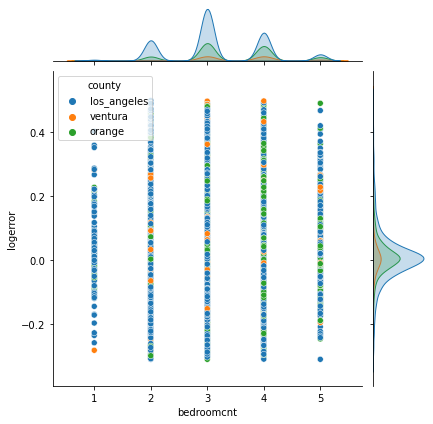

In [13]:
#creating a joinplot to see if any linear relationship (also adding in county)

print("Is there a relationship\nbetween bedroom count and logerror?")
sns.jointplot(x="bedroomcnt", y="logerror", data=train, hue = 'county')
plt.xlabel("Bedroom Count")
plt.ylabel("Logerror")
plt.show()

In [14]:
corr, p = stats.spearmanr(train.bedroomcnt, train.logerror)


if p < alpha:
    print('\nP is less than alpha. We reject the null hypothesis.')


P is less than alpha. We reject the null hypothesis.


Question 4) 

Is there a relationship between Lot size and logerror?


H_0: There is no relationship between lotsize and logerror

H_1: There is a relationship of mean between lotsize and logerror

Is there a relationship
between lotsize and logerror?


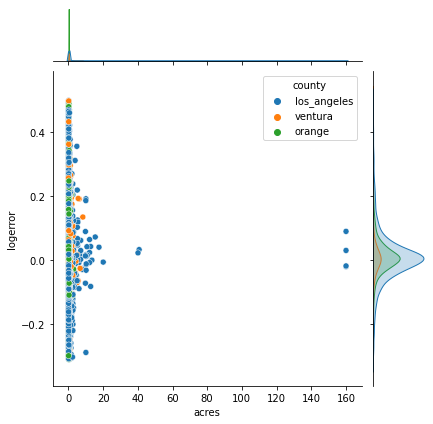

In [15]:
#creating a joinplot to see if any linear relationship (also adding in county)

print("Is there a relationship\nbetween lotsize and logerror?")
sns.jointplot(x="acres", y="logerror", data=train, hue = 'county')
plt.xlabel("Lot Size")
plt.ylabel("Logerror")
plt.show()

In [16]:
corr, p = stats.spearmanr(train.acres, train.logerror)

if p < alpha:
    print('\nP is less than alpha. We reject the null hypothesis.')
else: print('\nP is more than alpha. I accept the null hypothesis')


P is more than alpha. I accept the null hypothesis


Question 5)

Is there a relationship to logerror and calculated squarefeet?


H_0: There is no relationship between calculated sqft and logerror

H_1: There is a relationship of mean between calculated sqft and logerror

Is there a relationship
between lotsize and logerror?


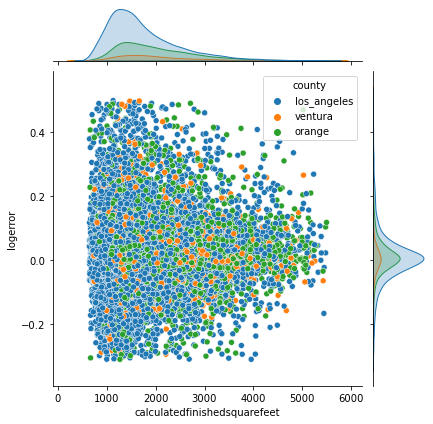

In [17]:
#creating a joinplot to see if any linear relationship (also adding in county)

print("Is there a relationship\nbetween lotsize and logerror?")
sns.jointplot(x="calculatedfinishedsquarefeet", y="logerror", data=train, hue = 'county')
plt.xlabel("Finished Squarefeet")
plt.ylabel("Logerror")
plt.show()

In [18]:
corr, p = stats.spearmanr(train.calculatedfinishedsquarefeet, train.logerror)

if p < alpha:
    print('\nP is less than alpha. We reject the null hypothesis.')
else: print('\nP is more than alpha. I accept the null hypothesis')


P is less than alpha. We reject the null hypothesis.


Text(0.5, 1.0, 'County v. Log Error')

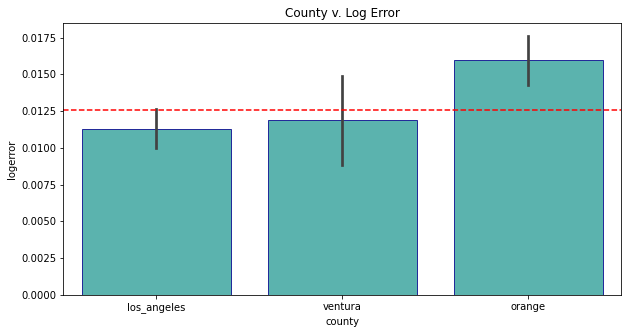

In [19]:
p = plt.figure(figsize=(10,5))
p = sns.barplot(train.county, train.logerror, data=train, alpha=.8, color='lightseagreen', edgecolor = 'darkblue')
overall_rate = train.logerror.mean()
p = plt.axhline(overall_rate, ls='--', color='red', )
plt.title('County v. Log Error')

# Clustering

